In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

# Add Gaussian noise to input
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)  # Keep values in valid range
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:
# Compile and train the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train_noisy, y_train, epochs=10, validation_data=(x_test_noisy, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8071 - loss: 0.6108 - val_accuracy: 0.9332 - val_loss: 0.2117
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9350 - loss: 0.2075 - val_accuracy: 0.9409 - val_loss: 0.1886
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9503 - loss: 0.1518 - val_accuracy: 0.9484 - val_loss: 0.1656
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9605 - loss: 0.1214 - val_accuracy: 0.9563 - val_loss: 0.1427
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9680 - loss: 0.0982 - val_accuracy: 0.9615 - val_loss: 0.1437
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9716 - loss: 0.0844 - val_accuracy: 0.9625 - val_loss: 0.1345
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9752 - loss: 0.0742 - val_accuracy: 0.9625 - val_loss: 0.1362
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9775 - loss: 0

Accuracy on Clean Test Data: 0.9732
Accuracy on Noisy Test Data: 0.9597


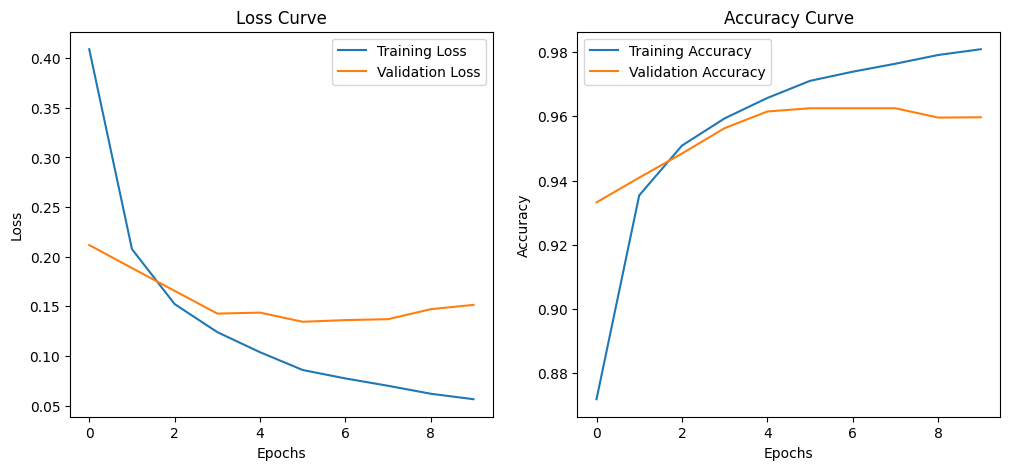

In [ ]:
# Evaluate accuracy on clean and noisy test data
clean_acc = model.evaluate(x_test, y_test, verbose=0)[1]
noisy_acc = model.evaluate(x_test_noisy, y_test, verbose=0)[1]

print(f"Accuracy on Clean Test Data: {clean_acc:.4f}")
print(f"Accuracy on Noisy Test Data: {noisy_acc:.4f}")

# Plot loss curves for training and validation
training_history = history.history

plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
# Access loss and validation loss using get method with a default empty list
plt.plot(training_history.get('loss', []), label='Training Loss')
plt.plot(training_history.get('val_loss', []), label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
# Access accuracy and validation accuracy using get method with a default empty list
plt.plot(training_history.get('accuracy', []), label='Training Accuracy')
plt.plot(training_history.get('val_accuracy', []), label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Noise Level 0.0: Accuracy = 0.9783
Noise Level 0.1: Accuracy = 0.9755
Noise Level 0.3: Accuracy = 0.9563
Noise Level 0.5: Accuracy = 0.9202
Noise Level 0.7: Accuracy = 0.8497


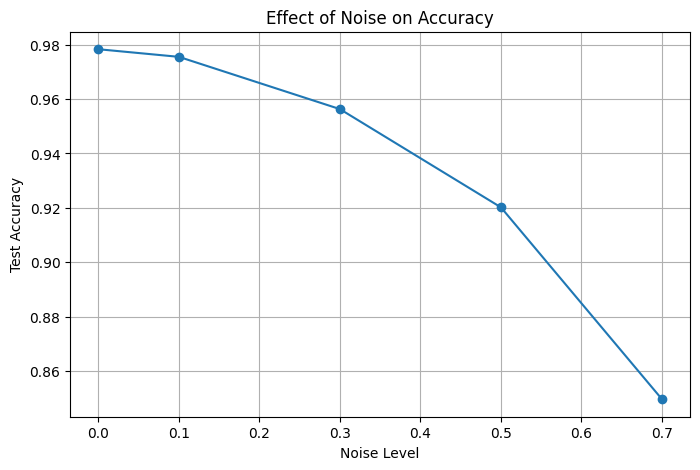

In [ ]:
# Experiment: Effect of Different Noise Levels on Accuracy
noise_levels = [0.0, 0.1, 0.3, 0.5, 0.7]
accuracy_results = []

for nf in noise_levels:
    x_train_temp = x_train + nf * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
    x_test_temp = x_test + nf * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
    x_train_temp, x_test_temp = np.clip(x_train_temp, 0., 1.), np.clip(x_test_temp, 0., 1.)

    # Train a new model for each noise level
    model_temp = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model_temp.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

    model_temp.fit(x_train_temp, y_train, epochs=5, verbose=0)  # Train for fewer epochs
    acc = model_temp.evaluate(x_test_temp, y_test, verbose=0)[1]

    accuracy_results.append(acc)
    print(f"Noise Level {nf}: Accuracy = {acc:.4f}")

# Plot effect of noise levels on accuracy
plt.figure(figsize=(8, 5))
plt.plot(noise_levels, accuracy_results, marker='o', linestyle='-')
plt.title("Effect of Noise on Accuracy")
plt.xlabel("Noise Level")
plt.ylabel("Test Accuracy")
plt.grid()
plt.show()

In [ ]:
# Define improved MLP model with regularization and normalization
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),  # L2 Regularization
    BatchNormalization(),  # Normalize activations
    Dropout(0.3),  # Prevent overfitting
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Output layer
])

# Compile and train the model using Huber Loss (Robust to noise)
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_noisy, y_train, epochs=10, validation_data=(x_test_noisy, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7693 - loss: 1.2191 - val_accuracy: 0.9295 - val_loss: 0.5247
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8987 - loss: 0.5883 - val_accuracy: 0.9284 - val_loss: 0.4446
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9091 - loss: 0.5059 - val_accuracy: 0.9361 - val_loss: 0.3985
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9095 - loss: 0.4782 - val_accuracy: 0.9369 - val_loss: 0.3785
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9132 - loss: 0.4458 - val_accuracy: 0.9103 - val_loss: 0.4369
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9149 - loss: 0.4471 - val_accuracy: 0.9437 - val_loss: 0.3470
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9166 - loss: 0.4404 - val_accuracy: 0.9366 - val_loss: 0.3659
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9161 - loss: 0

Accuracy on Clean Test Data: 0.9581
Accuracy on Noisy Test Data: 0.9485


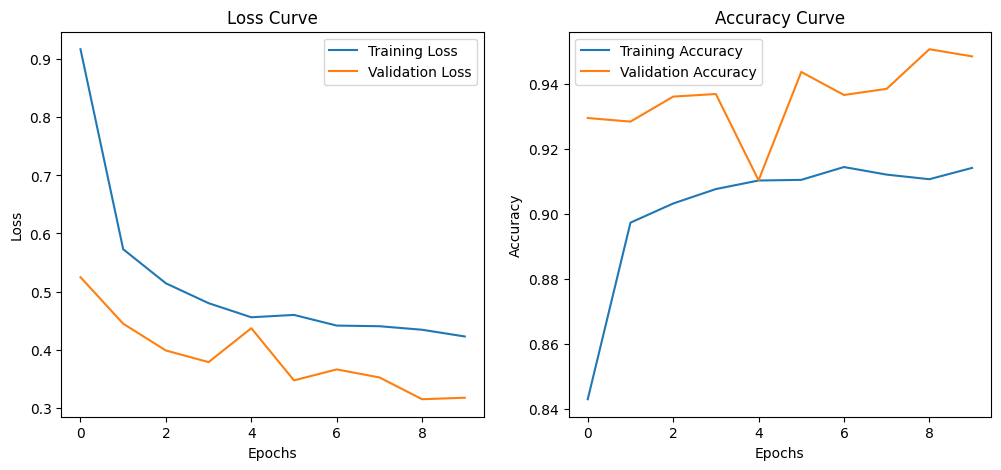

In [ ]:
# Evaluate accuracy on clean and noisy test data
clean_acc = model.evaluate(x_test, y_test, verbose=0)[1]
noisy_acc = model.evaluate(x_test_noisy, y_test, verbose=0)[1]

print(f"Accuracy on Clean Test Data: {clean_acc:.4f}")
print(f"Accuracy on Noisy Test Data: {noisy_acc:.4f}")

# Plot training & validation loss values
training_history = history.history

plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(training_history.get('loss', []), label='Training Loss')
plt.plot(training_history.get('val_loss', []), label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(training_history.get('accuracy', []), label='Training Accuracy')
plt.plot(training_history.get('val_accuracy', []), label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()